# IMPORTING LIBRARIES

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

### GETTING OUR DATASET

In [2]:
reviews_data = pd.read_csv(r'archive\amazon_alexa.tsv',delimiter='\t')
reviews_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
#Info about our data columns
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
#Statistical info of out numerical columns
reviews_data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### We will drop our date column since it's not neccessary at this moment

In [5]:
reviews_data.drop('date' , axis = 1 ,inplace= True)

## Data Visualization

In [6]:
#Checking for the null values in the data set
reviews_data.isnull().sum()

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64

<AxesSubplot: >

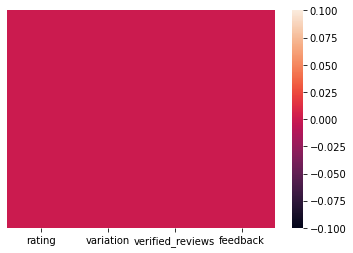

In [7]:
# Creating heatmaop of null values
sns.heatmap(reviews_data.isnull(),yticklabels=False)

### Since there are no null values in the data so every value corresponds to 1

<AxesSubplot: xlabel='rating', ylabel='count'>

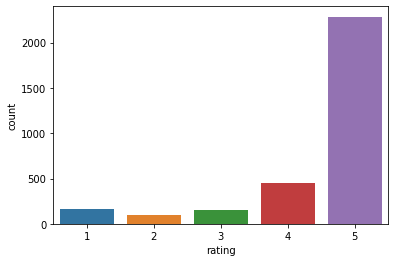

In [8]:
# Visualizing our data frame columns
sns.countplot(x = reviews_data['rating'])

### We can see that most of our reviews have got 5 star rating which means that most of our reveiws are positive

<AxesSubplot: xlabel='feedback', ylabel='count'>

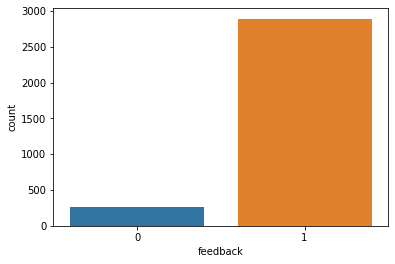

In [9]:
sns.countplot(x = reviews_data['feedback'])

### By this plot we can confirm that we have more positive reviews for the Alexa Echo

# Data Exploration

### Adding a new column of lenght of the rviews

In [10]:
reviews_data['length'] = reviews_data['verified_reviews'].apply(len)

In [11]:
reviews_data

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


(array([1.334e+03, 7.030e+02, 3.670e+02, 2.400e+02, 1.380e+02, 1.020e+02,
        6.400e+01, 4.700e+01, 2.700e+01, 2.600e+01, 2.600e+01, 1.900e+01,
        1.400e+01, 9.000e+00, 4.000e+00, 6.000e+00, 6.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.000e+00, 5.800e+01, 1.150e+02, 1.720e+02, 2.290e+02, 2.860e+02,
        3.430e+02, 4.000e+02, 4.570e+02, 5.140e+02, 5.710e+02, 6.280e+02,
        6.850e+02, 7.420e+02, 7.990e+02, 8.560e+02, 9.130e+02, 9.700e+02,
        1.027e+03, 1.084e+03, 1.141e+03, 1.198e+03, 1.255e+03, 1.312e+03,
        1.369e+03, 1.426e+03, 1.483e+03, 1.540e+03, 1.597e+03, 1.654e+03,
      

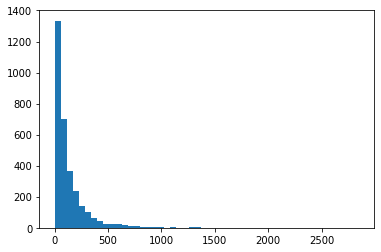

In [12]:
# Plotting a histogram for the columm length
plt.hist(x = reviews_data['length'],bins = 50)

### Here we can see that most of the reviews are short in length between 0-100 approxiamtely.

In [13]:
reviews_data.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [14]:
#Checking for the review of longest length
reviews_data[reviews_data['length']== 2851.000000]

,rating,variation,verified_reviews,feedback,length
2016,5,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [15]:
reviews_data[reviews_data['length']== 2851.000000]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

## Creating a Wordcloud

In [16]:
#TO obtain Rows with positive reviews
positive = reviews_data[reviews_data['feedback'] == 1]

In [17]:
positive

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [18]:
# To obtain rows with negative reviews
negative =  reviews_data[reviews_data['feedback'] == 0]
negative

,rating,variation,verified_reviews,feedback,length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,Black Dot,The only negative we have on this product is t...,0,240
3091,1,Black Dot,I didn’t order it,0,17


In [19]:
Positive_sentences = positive['verified_reviews'].tolist()
Negative_sentences = negative['verified_reviews'].tolist()
positive_line = ' '.join(Positive_sentences)
negative_line = ' '.join(Negative_sentences)

## Wordcloud of positive Reviews

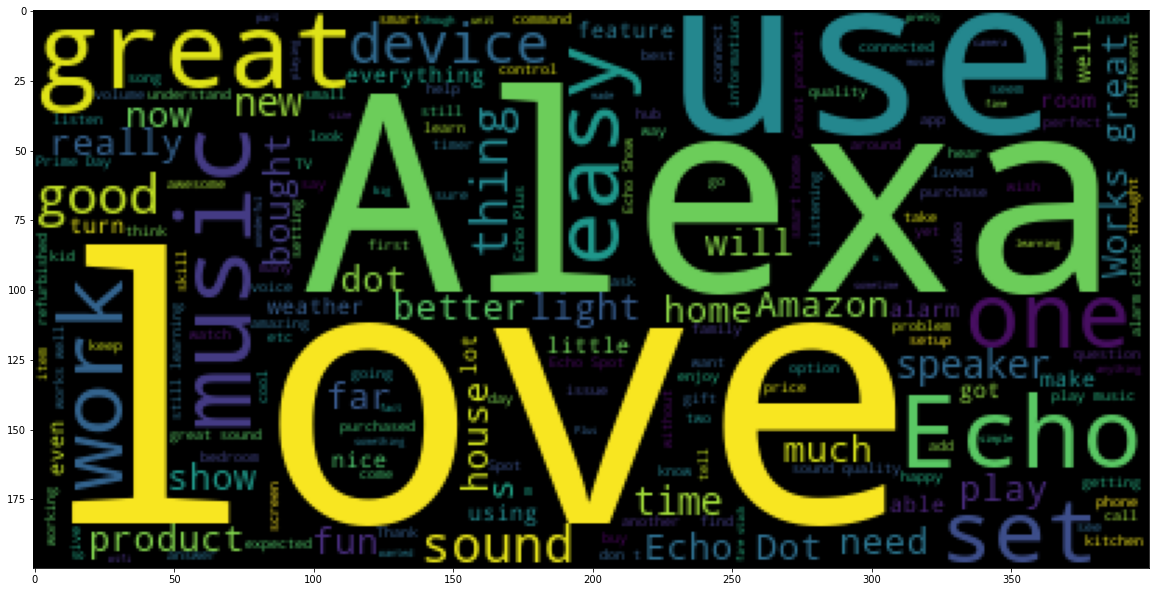

In [20]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_line))

## Wordcloud of negative Reviews

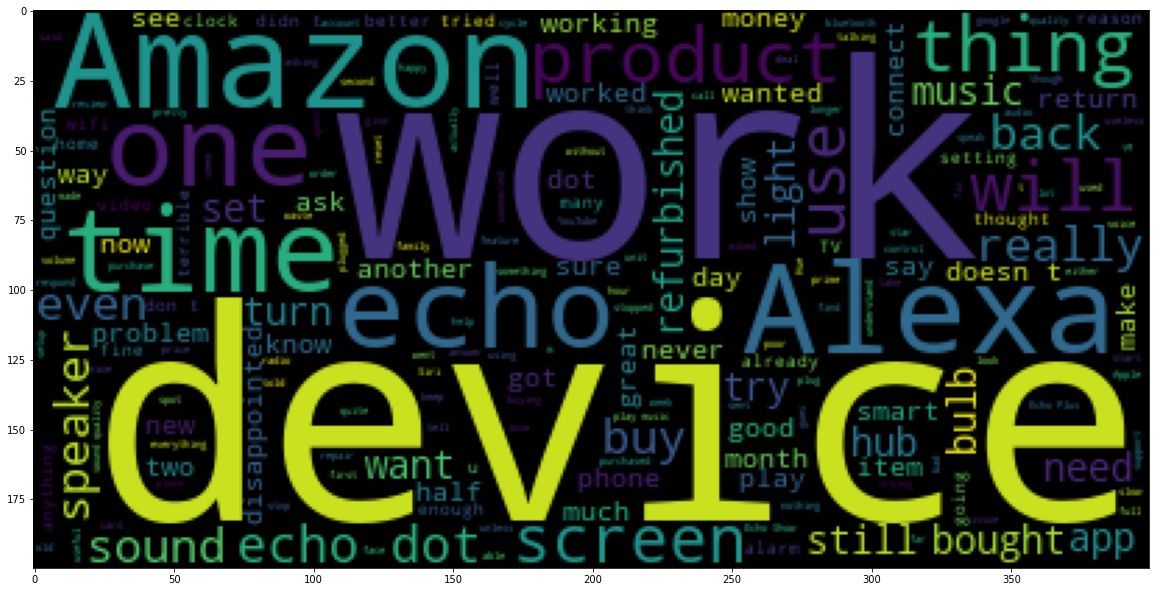

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_line))


# Text data Cleaning

#### Importing the ntlk library and downloading the stopwords

In [22]:
import string
import nltk
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
# Function to remove stopwords and punctuation
def message_cleaning(message):
    text_punc_removed = [char for char in message if char not in string.punctuation ]
    text_punc_removed_join = ''.join(text_punc_removed)
    text_punc_removed_join_clean = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return text_punc_removed_join_clean

In [25]:
#Cleaned Reviews Dataframe
reviews_data_cleaneddf = reviews_data['verified_reviews'].apply(message_cleaning) 

In [50]:
#Using Countvectorizer for tokenization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer= message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_data['verified_reviews'])

In [27]:
# Getting the feature names
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [28]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [30]:
x = reviews
x

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y = reviews_data['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [32]:
print(x.shape)
print(y.shape)

(3150, 5211)
(3150,)


In [33]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Applying Naive bayes Algorithm

In [34]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

## Importing metrics 

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot: >

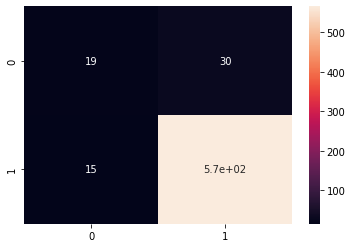

In [36]:
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm , annot= True)

In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.56      0.39      0.46        49
           1       0.95      0.97      0.96       581

    accuracy                           0.93       630
   macro avg       0.75      0.68      0.71       630
weighted avg       0.92      0.93      0.92       630



## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

<AxesSubplot: >

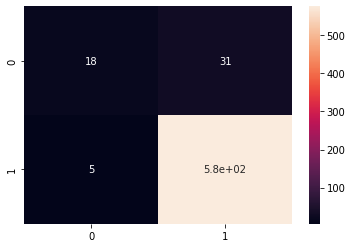

In [40]:
y_lr_predict = LR.predict(X_test)
cm_lr = confusion_matrix(y_test,y_lr_predict)
sns.heatmap(cm_lr , annot= True)

In [41]:
print(classification_report(y_test,y_lr_predict))

              precision    recall  f1-score   support

           0       0.78      0.37      0.50        49
           1       0.95      0.99      0.97       581

    accuracy                           0.94       630
   macro avg       0.87      0.68      0.73       630
weighted avg       0.94      0.94      0.93       630



### Let's try to find the best hyperparameters for our logistic regression model


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


In [43]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-package

Best: 0.937302 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


### So we can see that out best hyperparameters are 'C' : 10 ,'penalty' : l2 , 'solver' : 'liblinear'

In [45]:
lr_best = LogisticRegression(C = 10 ,penalty='l2',solver='liblinear')
lr_best.fit(X_train,y_train) 

LogisticRegression(C=10, solver='liblinear')

In [47]:
print(classification_report(lr_best.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.43      0.75      0.55        28
           1       0.99      0.95      0.97       602

    accuracy                           0.94       630
   macro avg       0.71      0.85      0.76       630
weighted avg       0.96      0.94      0.95       630

